In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
data = pd.read_excel('E:/压力变送器引压管故障诊断/data/feature_together.xlsx')

# 提取特征和标签列
X = data.iloc[:, 1:19]  # 2-19列是特征
# X = data.iloc[:, list(range(1, 3)) + list(range(4, 19))]  # 去除掉第四列，因为重要性是0
y = data.iloc[:, 19]    # 20列是标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.dtypes)
# print(y_train.dtypes)

In [128]:
precision=[]
recall=[]
f1score=[]
accuracy_plot=[]
type0=[]
type1=[]

In [8]:
from matplotlib import rcParams
from sklearn.metrics import classification_report, confusion_matrix
# 构建XGBoost分类器
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
report_dict = classification_report(y_test, y_pred)
# 如果需要，你还可以输出其他性能指标，如混淆矩阵、精确度、召回率等
print(confusion_matrix(y_test, y_pred))
print(report_dict)
print(X_test.shape)


Accuracy: 0.9939117199391172
[[289   1]
 [  3 364]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       290
           1       1.00      0.99      0.99       367

    accuracy                           0.99       657
   macro avg       0.99      0.99      0.99       657
weighted avg       0.99      0.99      0.99       657

(657, 18)


In [9]:
print(model.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [130]:
precision.append(0.99)
recall.append(0.99)
f1score.append(0.99)
accuracy_plot.append(0.9939)
type0.append(0.99)
type1.append(1.00)

[0.03204178 0.02263168 0.01251267 0.         0.04351987 0.02413074
 0.09355029 0.01822873 0.0136742  0.13873485 0.02473785 0.1379806
 0.05148951 0.06246102 0.0045992  0.08847827 0.00170662 0.22952205]


TypeError: unsupported operand type(s) for +: 'range' and 'int'

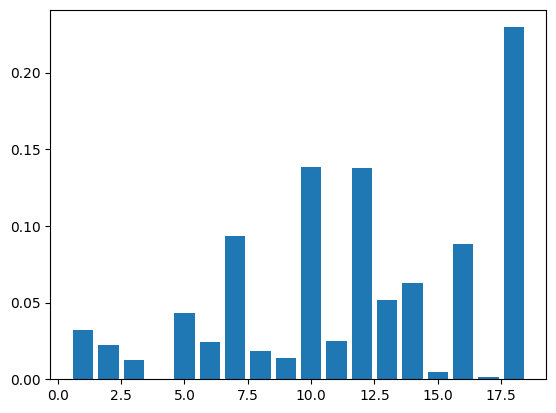

In [12]:
# 特征重要性
# plot
# print(model.feature_importances_)
# plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# plt.xlabel('feature number')
# plt.ylabel('Feature importance score')
# plt.title('Feature importance map')
# plt.show()

# 假设model是已经训练好的模型实例
print(model.feature_importances_)

# 绘制条形图
plt.bar(range(1,len(model.feature_importances_)+1), model.feature_importances_)

# 设置横坐标的刻度标签为特征的序号
plt.xticks(ticks=range(len(model.feature_importances_)+1), labels=range(len(model.feature_importances_)+1), rotation=45)

# 设置横坐标和纵坐标的名称
plt.xlabel('Feature number')
plt.ylabel('Feature importance score')

# 设置图表的标题
plt.title('Feature importance map')

# 显示图表
plt.tight_layout()  # 调整布局以适应所有的标签
plt.show()

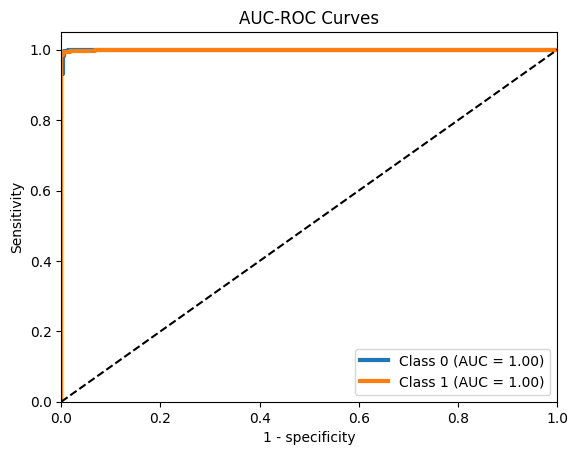

In [132]:
# 评估xgboost 模型的性能 ——AUC-ROC曲线
from sklearn.metrics import roc_curve, auc
# Get the probability predictions for each class
proba_predictions = model.predict_proba(X_test)

# Compute the AUC-ROC curve for each class
#plt.figure(figsize=(10, 8))
num_classes=2
for class_index in range(num_classes):
    # Convert the class labels to binary encoding
    binary_labels = (y_test == class_index).astype(int)
    
    # Get the predicted probabilities for the positive class
    positive_probs = proba_predictions[:, class_index]
    
    # Compute the FPR, TPR, and AUC for the current class
    fpr, tpr, _ = roc_curve(binary_labels, positive_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot the AUC-ROC curve for the current class
    plt.plot(fpr, tpr, label='Class %d (AUC = %0.2f)' % (class_index, roc_auc),linewidth = 3)

# Set the plot properties and legend
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificity')
plt.ylabel('Sensitivity')
plt.title('AUC-ROC Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()


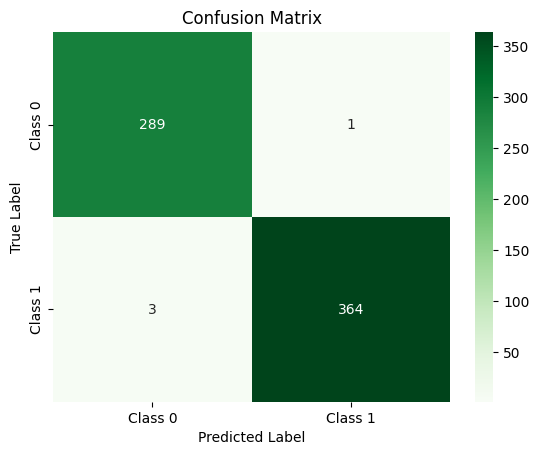

In [133]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 预测验证数据集的类别
pred_labels = y_pred

# 计算混淆矩阵
cm = confusion_matrix(y_test, pred_labels)

# 获取类别标签
class_labels = ['Class 0', 'Class 1']

# 绘制混淆矩阵的热力图
plt.figure()#figsize=(12, 9)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [134]:
from sklearn.svm import SVC
# 创建SVM分类器
svm_classifier = SVC(kernel='rbf', random_state=42)
X_train.columns = X_train.columns.astype(str)
# y_train.columns = y_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
# y_test.columns = y_train.columns.astype(str)
# 在训练集上训练模型
svm_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm_classifier.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.558599695585997
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.56      1.00      0.72       367

    accuracy                           0.56       657
   macro avg       0.28      0.50      0.36       657
weighted avg       0.31      0.56      0.40       657



c:\Users\zxf\.conda\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zxf\.conda\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zxf\.conda\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
precision.append(0.31)
recall.append(0.56)
f1score.append(0.40)
accuracy_plot.append(0.5586)
type0.append(0)
type1.append(0.56)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
# 创建k近邻分类器，这里选择k=5，你可以根据需要调整
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# 在训练集上训练模型
knn_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = knn_classifier.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.7077625570776256
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       290
           1       0.76      0.70      0.73       367

    accuracy                           0.71       657
   macro avg       0.71      0.71      0.71       657
weighted avg       0.71      0.71      0.71       657



In [137]:
precision.append(0.71)
recall.append(0.71)
f1score.append(0.71)
accuracy_plot.append(0.7078)
type0.append(0.66)
type1.append(0.76)

In [138]:
from sklearn.linear_model import LogisticRegression
# 创建逻辑回归模型
logreg_model = LogisticRegression(random_state=42)

# 在训练集上训练模型
logreg_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg_model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.558599695585997
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.56      1.00      0.72       367

    accuracy                           0.56       657
   macro avg       0.28      0.50      0.36       657
weighted avg       0.31      0.56      0.40       657



c:\Users\zxf\.conda\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zxf\.conda\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zxf\.conda\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
precision.append(0.31)
recall.append(0.56)
f1score.append(0.40)
accuracy_plot.append(0.5586)
type0.append(0)
type1.append(0.56)

In [140]:
from sklearn.tree import DecisionTreeClassifier
# 创建决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)

# 在训练集上训练模型
dt_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = dt_classifier.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.9771689497716894
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       290
           1       0.98      0.98      0.98       367

    accuracy                           0.98       657
   macro avg       0.98      0.98      0.98       657
weighted avg       0.98      0.98      0.98       657



In [141]:
precision.append(0.98)
recall.append(0.98)
f1score.append(0.98)
accuracy_plot.append(0.9772)
type0.append(0.97)
type1.append(0.98)

In [142]:
from sklearn.ensemble import RandomForestClassifier
# 创建Random Forest分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 在训练集上训练模型
rf_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_classifier.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.9558599695585996
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       290
           1       0.95      0.97      0.96       367

    accuracy                           0.96       657
   macro avg       0.96      0.95      0.96       657
weighted avg       0.96      0.96      0.96       657



In [143]:
precision.append(0.96)
recall.append(0.96)
f1score.append(0.96)
accuracy_plot.append(0.9559)
type0.append(0.96)
type1.append(0.95)

In [144]:
#CNN算法代码在matlab中，结果如下
precision.append(0.7215)
recall.append(0.8553)
f1score.append(0.78)
accuracy_plot.append(0.8176)
type0.append(0.855)
type1.append(0.794)

In [145]:
title = ['XGBoost','SVM','k-NN','Logistic Regression','Decision Tree','Random Forest','CNN']

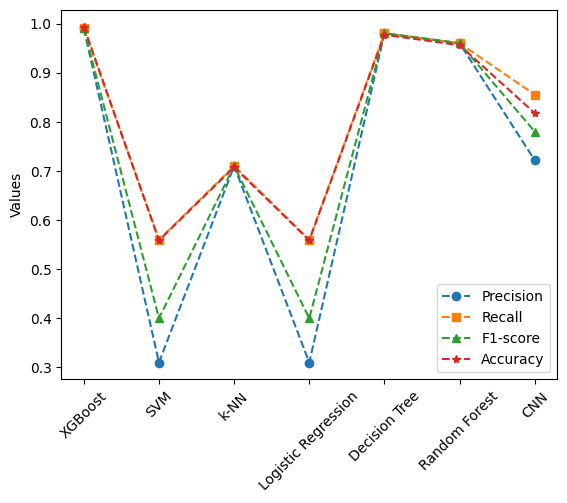

<Figure size 640x480 with 0 Axes>

In [146]:
# 所有算法的性能效果
x_values = [1, 2, 3, 4, 5, 6, 7]
y1_values = precision
y2_values = recall
y3_values = f1score
y4_values = accuracy_plot

# 绘制折线图，并显示每个数据点的形状
plt.plot(x_values, y1_values, label='Precision', marker='o', linestyle='--')
plt.plot(x_values, y2_values, label='Recall', marker='s', linestyle='--')
plt.plot(x_values, y3_values, label='F1-score', marker='^', linestyle='--')
plt.plot(x_values, y4_values, label='Accuracy', marker='*', linestyle='--')

# 添加图例
plt.legend()

# 设置X轴坐标点的名称
plt.xticks(x_values, title, rotation=45)

# 添加标题和标签
#plt.title('The results of each algorithm model')
#plt.xlabel('X-axis Label')
plt.ylabel('Values')
plt.figure(dpi=100)
# 显示图形
plt.show()

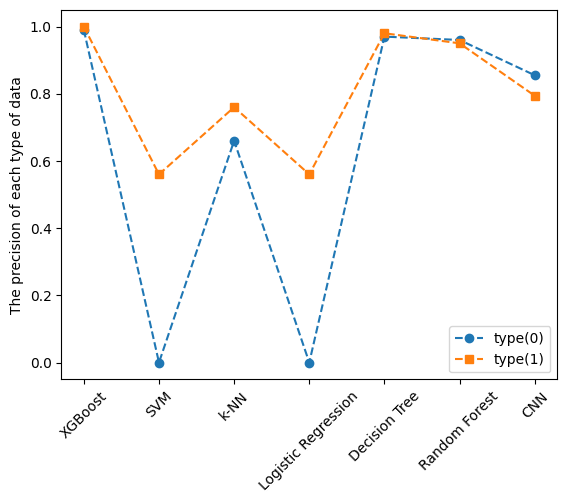

In [147]:
# 两类数据的不同算法准确度结果比较
y1_values = type0
y2_values = type1

# 绘制折线图，并显示每个数据点的形状
plt.plot(x_values, y1_values, label='type(0)', marker='o', linestyle='--')
plt.plot(x_values, y2_values, label='type(1)', marker='s', linestyle='--')

# 添加图例
plt.legend()

# 设置X轴坐标点的名称
plt.xticks(x_values, title, rotation=45)

# 添加标题和标签
#plt.title('Robustness comparison of algorithm models')
#plt.xlabel('X-axis Label')
plt.ylabel('The precision of each type of data')

# 显示图形
plt.show()

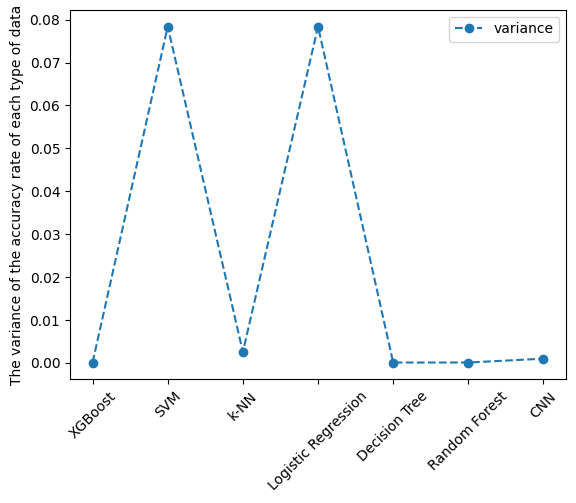

In [148]:
# 方差
# 计算方差
def varcompute(num):
    data_num = []
    data_num.append(type0[num])
    data_num.append(type1[num])
    variance = np.var(data_num)
    return variance

all_variance = []
for i in range(len(title)):
    all_variance.append(varcompute(i))

# 绘制折线图，并显示每个数据点的形状
plt.plot(x_values, all_variance, label='variance', marker='o', linestyle='--')

# 添加图例
plt.legend()

# 设置X轴坐标点的名称
plt.xticks(x_values, title, rotation=45)

# 添加标题和标签
#plt.title('Robustness comparison of algorithm models')
#plt.xlabel('X-axis Label')
plt.ylabel('The variance of the accuracy rate of each type of data')

# 显示图形
plt.show()

In [150]:
print(accuracy_plot)

[0.9939, 0.5586, 0.7078, 0.5586, 0.9772, 0.9559, 0.8176]


In [ ]:
from matplotlib import rcParams
# 构建LGBoost分类器
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
report_dict = classification_report(y_test, y_pred)
# 如果需要，你还可以输出其他性能指标，如混淆矩阵、精确度、召回率等
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(report_dict)